<center>
    <img src="https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png" width="50%">
</center>

----------

<h1 align="center"> Toronto Machine Learning Summit </h1>
<br>
<center align="left"> <font size='4'>  Developed by: </font><font size='4' color='#33AAFBD'>WeCloudData Academy </font></center>
<br>
<center align="left"> <font size='4' color='#FF5713'> Accelerating your data science career! </font></center>
<br>

----------

In [7]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

# from mlxtend.plotting import plot_decision_regions
# from mlxtend.classifier import StackingClassifier

from xgboost import XGBClassifier

In [8]:
# local
df = pd.read_csv('prepped.csv')

In [9]:
# google colab
# titanic = pd.read_csv('https://s3.amazonaws.com/weclouddata/workshops/ml_opendata/prepped.csv')

In [10]:
df.shape

(28661, 603)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28661 entries, 0 to 28660
Columns: 603 entries, year to month_12
dtypes: int64(603)
memory usage: 131.9 MB


### Train Test Split

In [12]:
X = df.drop(columns='label')

y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## $\Delta$ Simpler Models

### Logistic Regression

In [13]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_proba = lr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, lr_pred))

roc_auc_score(y_test, lr_proba)

             precision    recall  f1-score   support

          0       0.87      0.98      0.92      6048
          1       0.65      0.20      0.31      1118

avg / total       0.84      0.86      0.83      7166



0.8782306396768607

### Exercise

- Try training a Decision Tree model
- Get the classification report scores
- Get the ROC AUC score
- Try different hyper parameters and see if you can improve the score

In [14]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_proba = dt.predict_proba(X_test)[:, 1]

print(classification_report(y_test, dt_pred))

roc_auc_score(y_test, dt_proba)

             precision    recall  f1-score   support

          0       0.90      0.91      0.90      6048
          1       0.47      0.43      0.45      1118

avg / total       0.83      0.84      0.83      7166



0.6800693586667425

## $\Delta$ Grid Search

Instead of hand tuning the hyperparameters, we can automate this task by doing a "Grid Search". We list out a values for different hyperparameters and the Grid Search function tries out every combination.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [15]:
# parameters = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.1, 1, 10]
# }

# lr = LogisticRegression()
# clf = GridSearchCV(lr, parameters, cv=5, n_jobs=-1, verbose=10)
# clf.fit(X_train, y_train)

### Exercise

- Try using Grid Search with a Decision Tree
- Pick any hyper parameters you like

The full list of hyper parameters can be found at:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [16]:
# parameters = {
#     'criterion': ['gini', 'entropy']
#     'max_depth': [1, 5, 10],
# }

# lr = LogisticRegression()
# clf = GridSearchCV(lr, parameters, cv=5, n_jobs=-1, verbose=10)
# clf.fit(X_train, y_train)

## $\Delta$ Ensemble Methods

Ensembling is the idea of combining the predictions of multiple models to improve their performance over each individual model. We're going to explore the following techniques:

- Voting
- Bagging
- Boosting
- Stacking

https://scikit-learn.org/stable/modules/ensemble.html

### Example dataset

We're going to borrow a simple dataset to demonstrate these techniques. 

> Suppose four people throw a combined 187 darts at a board. For 150 of those we get to see who threw each dart and where it landed. For the rest, we only get to see where the dart landed. Our task is to guess who threw each of the unlabelled darts based on their landing spot.

https://gormanalysis.com/guide-to-model-stacking-i-e-meta-ensembling/

In [17]:
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

train_df['label'] = train_df['Competitor'].astype('category').cat.codes
test_df['label'] = test_df['Competitor'].astype('category').cat.codes

In [18]:
train_df.head()

,ID,XCoord,YCoord,Competitor,label
0,111,0.943354,-0.184819,Bob,0
1,92,0.121557,-0.927656,Bob,0
2,20,0.818485,0.375437,Bob,0
3,75,0.867462,-0.159851,Sue,3
4,10,-0.817321,-0.373419,Kate,1


We can make a scatter plot and color code where each of the four people's darts landed.

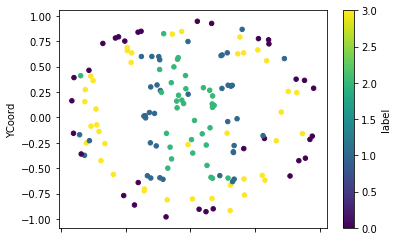

In [19]:
train_df.plot.scatter(x='XCoord', y='YCoord', c='label', colormap='viridis')

This is what our test set looks like. Our goal is to predict who threw each dart based on where they landed.

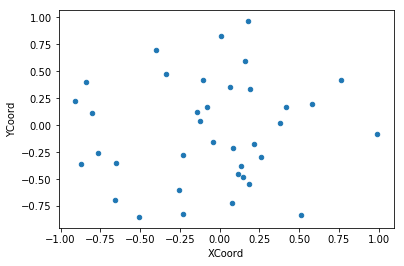

In [20]:
test_df.plot.scatter(x='XCoord', y='YCoord')

### Create modelling dataset

In [21]:
X_train_d = train_df[['XCoord', 'YCoord']]
y_train_d = train_df['label']

X_test_d = test_df[['XCoord', 'YCoord']]
y_test_d = test_df['label']

## Models

Here we try out three different models and plot the decision boundaries of their predictions.

## K-Nearest Neighbours

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_d, y_train_d)

plot_decision_regions(X_train_d.values, y_train_d.values, clf=knn)

knn.score(X_test_d, y_test_d)

NameError: name 'plot_decision_regions' is not defined

## Support Vector Machine

In [ ]:
svm = SVC(C=10)

svm.fit(X_train_d, y_train_d)

plot_decision_regions(X_train_d.values, y_train_d.values, clf=svm)

svm.score(X_test_d, y_test_d)

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(X_train_d, y_train_d)

plot_decision_regions(X_train_d.values, y_train_d.values, clf=dt)

dt.score(X_test_d, y_test_d)

## Voting

We can see that each model makes different predictions based on the way they generate the decision boundaries. The idea behind a Voting Classifier is to build multiple models, get their predictions, and let them them "vote" on the final prediction.

https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = SVC(C=10)
clf3 = DecisionTreeClassifier()

estimators = [
    ('knn', clf1),
    ('svm', clf2),
    ('dt', clf3)
]

vclf = VotingClassifier(estimators=estimators)

vclf = vclf.fit(X_train_d, y_train_d)

plot_decision_regions(X_train_d.values, y_train_d.values, clf=vclf)

vclf.score(X_test_d, y_test_d)

## Exercise

- Create a Voting Classifier with Logistic Regression and a Decision Tree
- Remember to set `voting` to `soft` so we can get predicted probabilities
- Get the ROC AUC score

In [ ]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

estimators = [
    ('lr', clf1),
    ('dt', clf2)
]

vclf = VotingClassifier(estimators=estimators, voting='soft')

vclf = vclf.fit(X_train, y_train)

vclf_proba = vclf.predict_proba(X_test)[:, -1]

roc_auc_score(y_test, vclf_proba)

## Bagging

Bagging is similar to Voting, but instead of different models learning different patterns, the idea is to have one type of model look at different subsets of the data. Bagging uses Bootstrap sampling to pick random subsets of data and trains a separate model on each. The results are aggregated using a majority vote.

https://scikit-learn.org/stable/modules/ensemble.html#forest

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train_d, y_train_d)

plot_decision_regions(X_train_d.values, y_train_d.values, clf=rf)

rf.score(X_test_d, y_test_d)

### Exercise

- Try a Random Forest model on the Subway dataset
- Get the ROC AUC Score
- Try tuning the hyper parameters to improve the score

In [ ]:
rf = RandomForestClassifier(n_estimators=50)

rf.fit(X_train, y_train)

rf_proba = rf.predict_proba(X_test)[:, -1]

roc_auc_score(y_test, rf_proba)

## Boosting

Whereas with Bagging we reduce the variance by averaging the results of multiple models, Boosting builds models sequentially to try and reduce bias. The idea is to "boost" weak models by having subsenquent models focus on the errors of the previous ones.

https://xgboost.readthedocs.io/en/latest/tutorials/model.html

In [ ]:
xgb = XGBClassifier(silent=False, n_jobs=-1)

xgb.fit(X_train_d, y_train_d)

xgb.score(X_test_d, y_test_d)

### Exercise

- Try an XGBoost model on the Subway dataset
- Get the ROC AUC Score
- Try tuning the hyper parameters to improve the score

In [ ]:
xgb = XGBClassifier(silent=False, n_jobs=-1)

xgb.fit(X_train.values, y_train.values)

xgb_proba = xgb.predict_proba(X_test.values)[:, -1]

roc_auc_score(y_test.values, xgb_proba)

## Stacking

> Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier. The individual classification models are trained based on the complete training set; then, the meta-classifier is fitted based on the outputs -- meta-features -- of the individual classification models in the ensemble. The meta-classifier can either be trained on the predicted class labels or probabilities from the ensemble.

<img src="https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier_files/stackingclassification_overview.png">

https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = SVC(C=10)
clf3 = DecisionTreeClassifier()

meta = RandomForestClassifier()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=meta)

sclf.fit(X_train_d, y_train_d)

plot_decision_regions(X_train_d.values, y_train_d.values, clf=sclf)

sclf.score(X_test_d, y_test_d)

### Exercise

- Try Stacking Random Forest, XGBoost, and Logistic Regression
- Use Logistic Regression as the meta classifier
- Get the ROC AUC Score
- Try changing the meta classifier. How does it effect the performance?

In [ ]:
clf1 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf2 = XGBClassifier(n_jobs=-1)
clf3 = LogisticRegression()

meta = RandomForestClassifier()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=meta)

sclf.fit(X_train.values, y_train.values)

sclf_proba = sclf.predict_proba(X_test.values)[:, -1]

roc_auc_score(y_test.values, sclf_proba)